---
### Machine Learning Classification Model
---
#### I. Load the data

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('data/Microsoft_LinkedIn_Processed.xlsx', parse_dates=['Date'], index_col=0)
df.head(n=5)

,Close,High,Low,Open,Volume,change_tomorrow,change_tomorrow_direction
Date,,,,,,,
2016-12-08,55.181126,55.696671,55.027369,55.443420,21220800,1.549151,UP
2016-12-09,56.049416,56.067505,55.289669,55.334891,27349400,0.321666,UP
2016-12-12,56.230289,56.347870,55.823285,55.913730,20198100,1.286169,UP
2016-12-13,56.962929,57.360890,56.293630,56.528788,35718900,-0.478644,DOWN
2016-12-14,56.691578,57.388013,56.555907,56.981005,30352700,-0.159789,DOWN


---
#### II. Machine Learning Model

Separate the data.

1. Target: which variable do you want to predict?
2. Explanatory: which variables will you use to calculate the prediction?

In [3]:
target = df.change_tomorrow_direction
explanatory = df[['Open','High','Low','Close','Volume']]

Compute the model. The following Python code will compute the numbers of the mathematical equation that we will use to calculate if the ticker goes UP or DOWN.

In [4]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(max_depth=15)
model_dt.fit(X=explanatory, y=target)

DecisionTreeClassifier(max_depth=15)

Visualize the model.

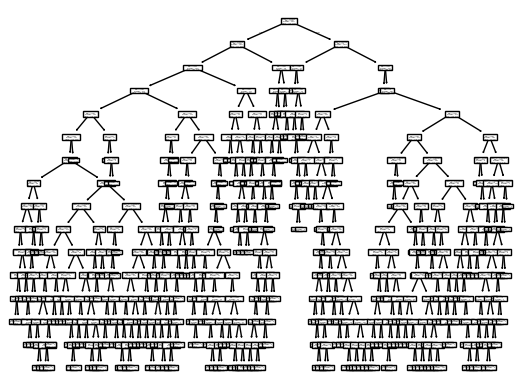

In [6]:
from sklearn.tree import plot_tree

plot_tree(decision_tree=model_dt, feature_names=model_dt.feature_names_in_);

Calculate the predictions.

In [7]:
y_pred = model_dt.predict(X=explanatory)
y_pred

array(['UP', 'UP', 'UP', ..., 'UP', 'UP', 'DOWN'], dtype=object)

In [11]:
df_predictions = df[['change_tomorrow_direction']].copy()
df_predictions['prediction'] = y_pred
df_predictions

,change_tomorrow_direction,prediction
Date,,
2016-12-08,UP,UP
2016-12-09,UP,UP
2016-12-12,UP,UP
2016-12-13,DOWN,DOWN
2016-12-14,DOWN,DOWN
...,...,...
2025-03-28,DOWN,UP
2025-03-31,UP,UP
2025-04-01,DOWN,UP


Evaluate the model: compare predictions with the reality.

In [12]:
comp = df_predictions.change_tomorrow_direction == df_predictions.prediction

correct_predictions = comp.sum()
total_predictions = len(comp)
accuracy = correct_predictions / total_predictions

print(f"Correct Predictions: {correct_predictions}.")
print(f"Total Predictions: {total_predictions}.")
print(f"Accuracy: {accuracy:.2%}.")

Correct Predictions: 1671.
Total Predictions: 2091.
Accuracy: 79.91%.


In [13]:
accuracy = model_dt.score(X=explanatory, y=target)
print(f"Decision Tree Accuracy: {accuracy:.2%}.")

Decision Tree Accuracy: 79.91%.


---
#### III. Save the model into a file

- We'll write the numbers of the Decision Tree's mathematical equation into a file.

In [14]:
import pickle

In [15]:
with open('models/model_dt_classification.pkl', 'wb') as f:
    pickle.dump(model_dt, f)